In [1]:
'''Clear out temporary variables and get a clean session'''
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
import pandas as pd
import pickle
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

In [3]:
'''Open pickled file'''
with open('ib_ml_df.pkl', 'rb') as f:
    ib_df = pickle.load(f)
    
with open('ib_df_interview.pkl', 'rb') as f:
    ib_df_interview = pickle.load(f)
    
with open('magnet_ml_df.pkl', 'rb') as f:
    magnet_df = pickle.load(f)

<AxesSubplot:>

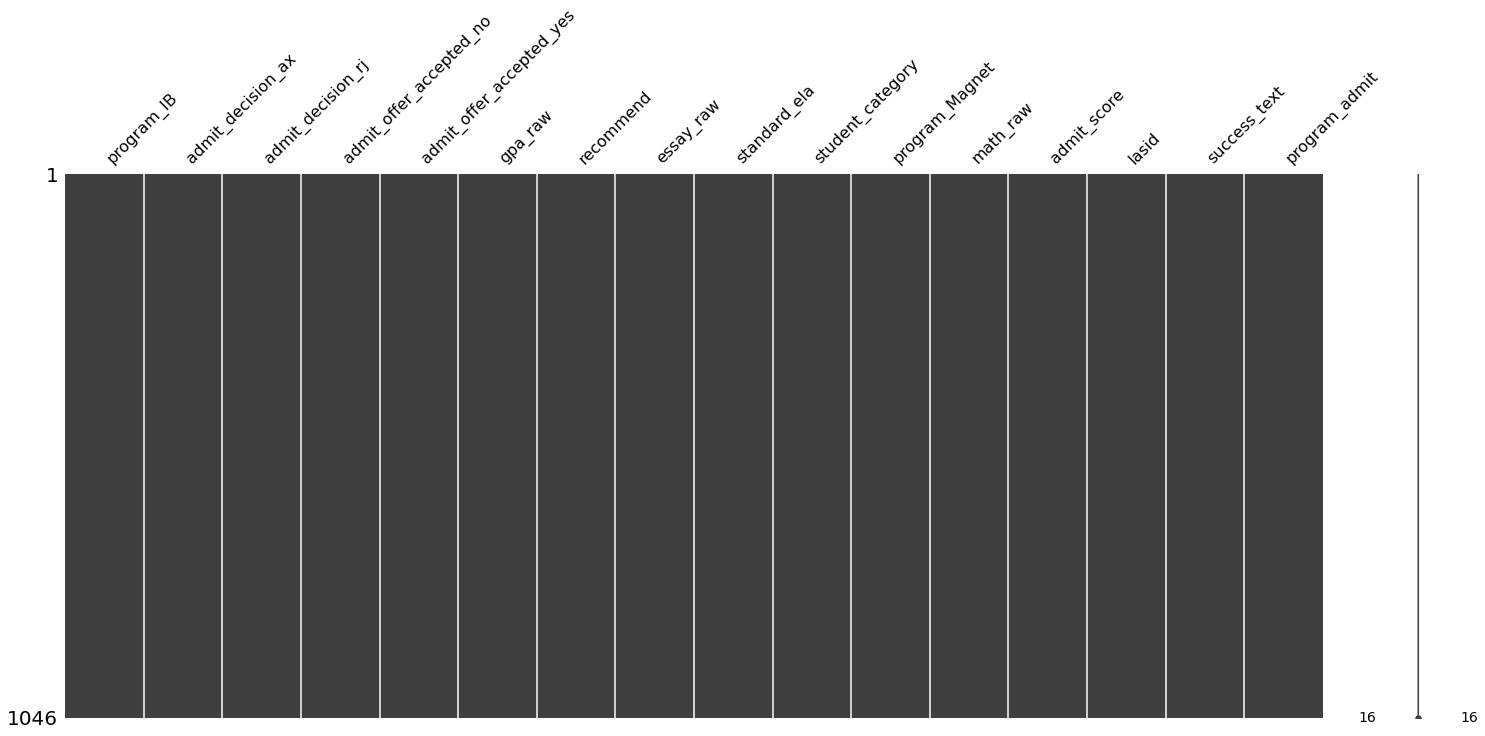

In [4]:
msno.matrix(ib_df)

In [5]:
'''Retain relevant columns'''
drop_list = ['program_IB', 'admit_decision_ax', 'admit_decision_rj', 'admit_offer_accepted_no', 'admit_offer_accepted_yes', 
              'student_category', 'program_Magnet', 'lasid', 'program_admit']
ib_df.drop(drop_list, axis = 1, inplace = True)

<AxesSubplot:>

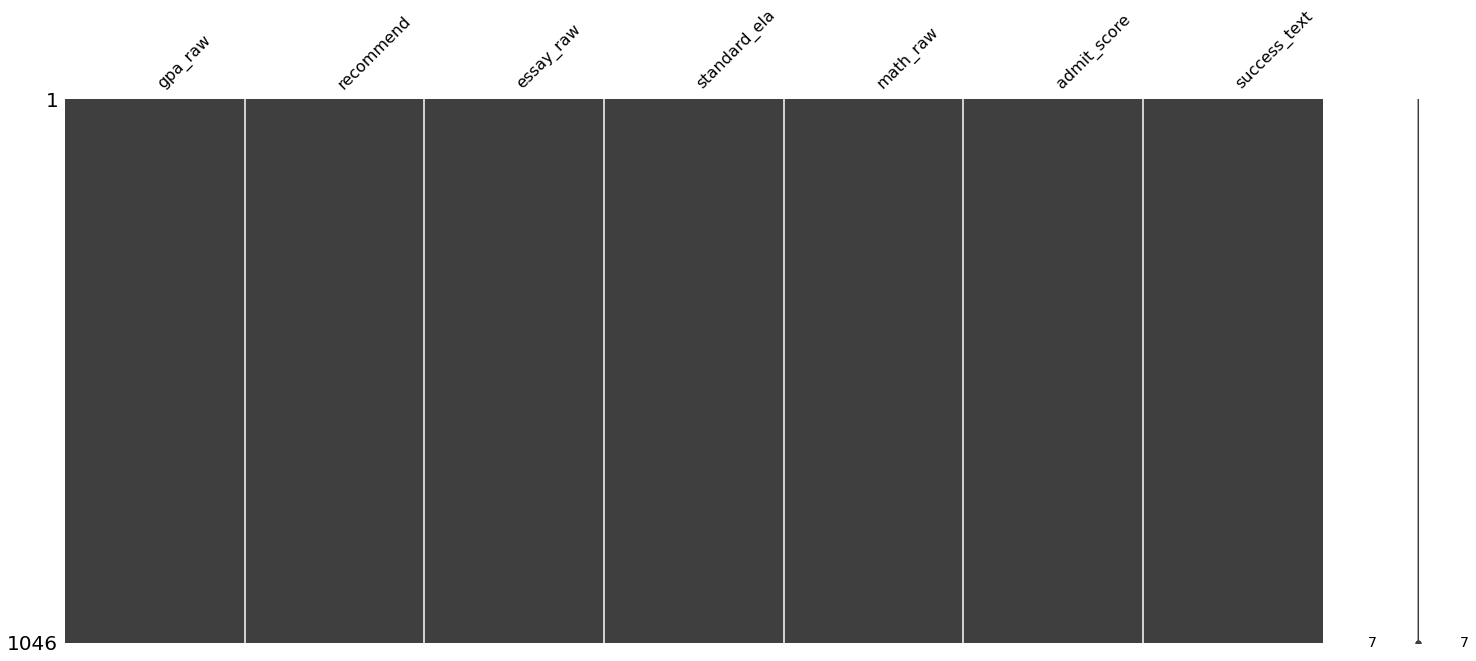

In [6]:
msno.matrix(ib_df)

<AxesSubplot:>

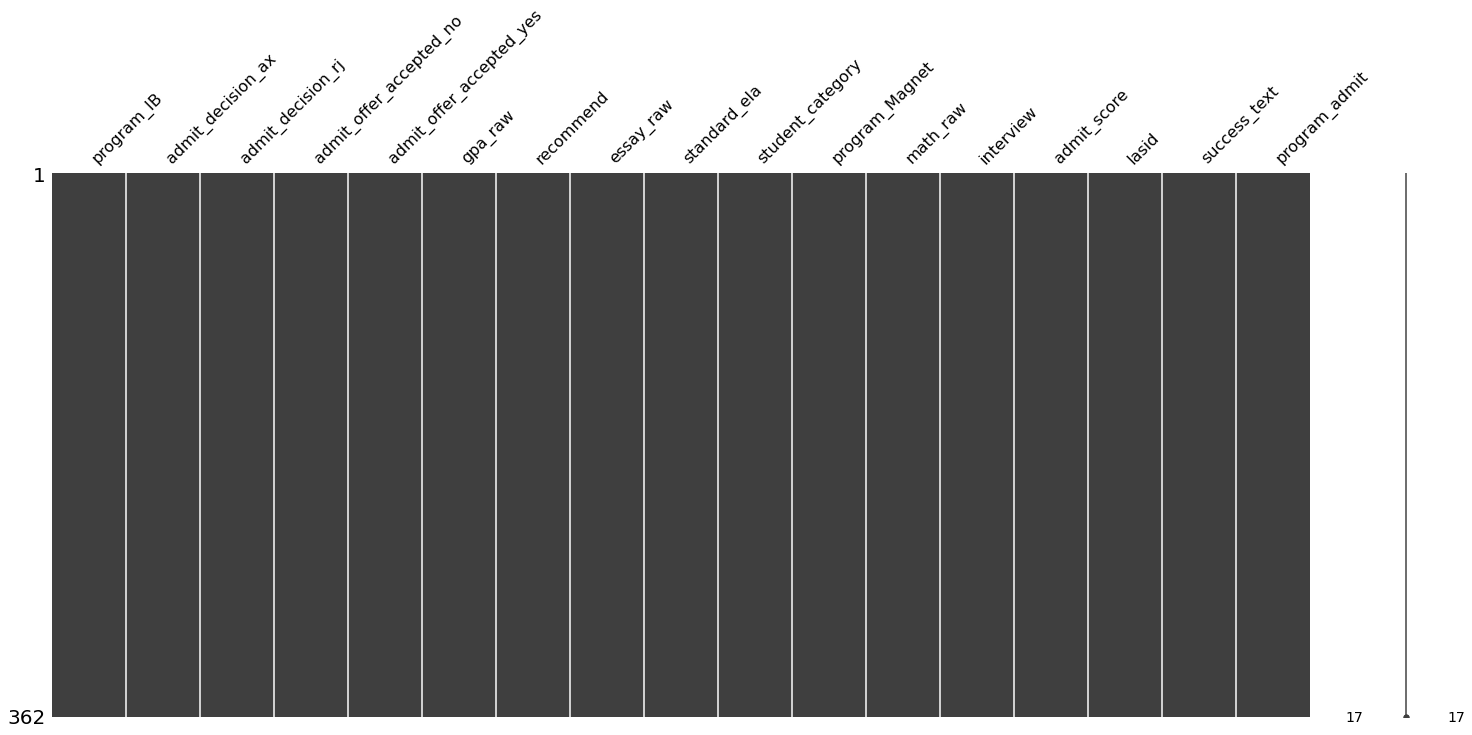

In [7]:
msno.matrix(ib_df_interview)

In [8]:
'''Retain relevant columns'''
drop_list = ['program_IB', 'admit_decision_ax', 'admit_decision_rj', 'admit_offer_accepted_no', 'admit_offer_accepted_yes', 
              'student_category', 'program_Magnet', 'lasid', 'program_admit']
ib_df_interview.drop(drop_list, axis = 1, inplace = True)

<AxesSubplot:>

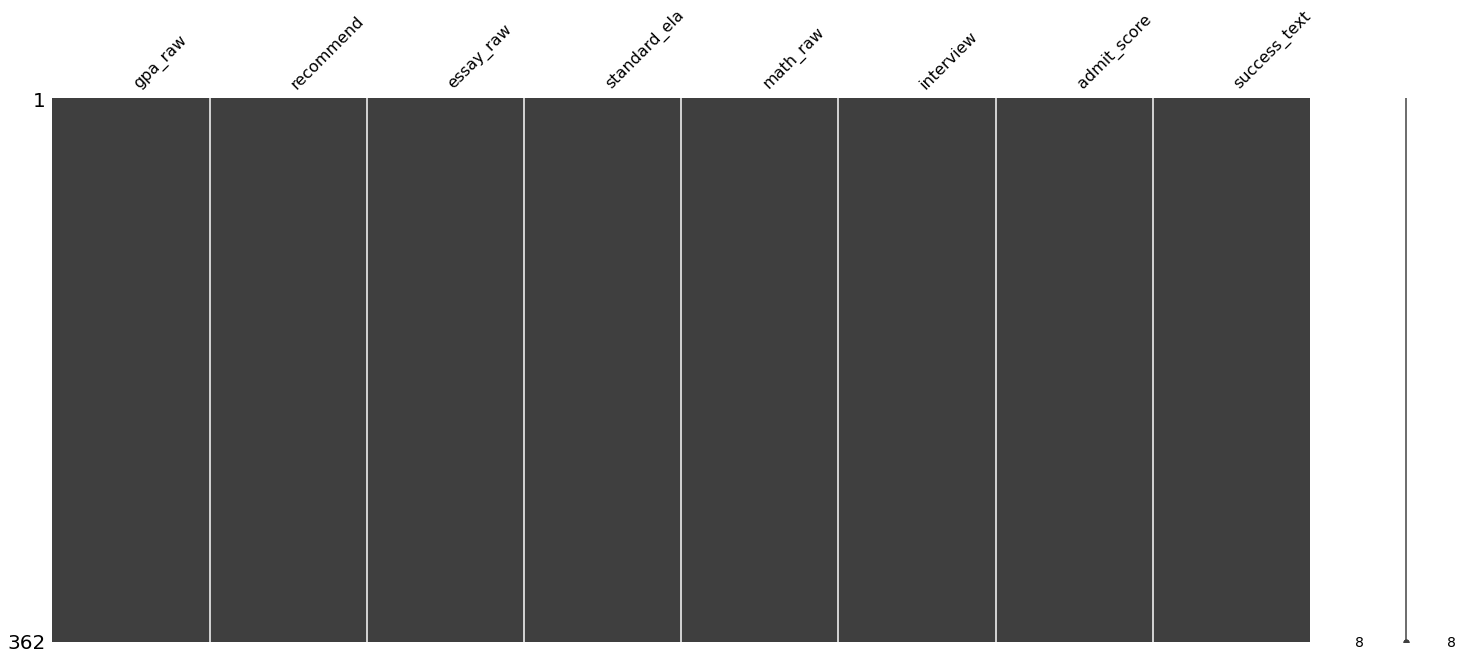

In [9]:
msno.matrix(ib_df_interview)

<AxesSubplot:>

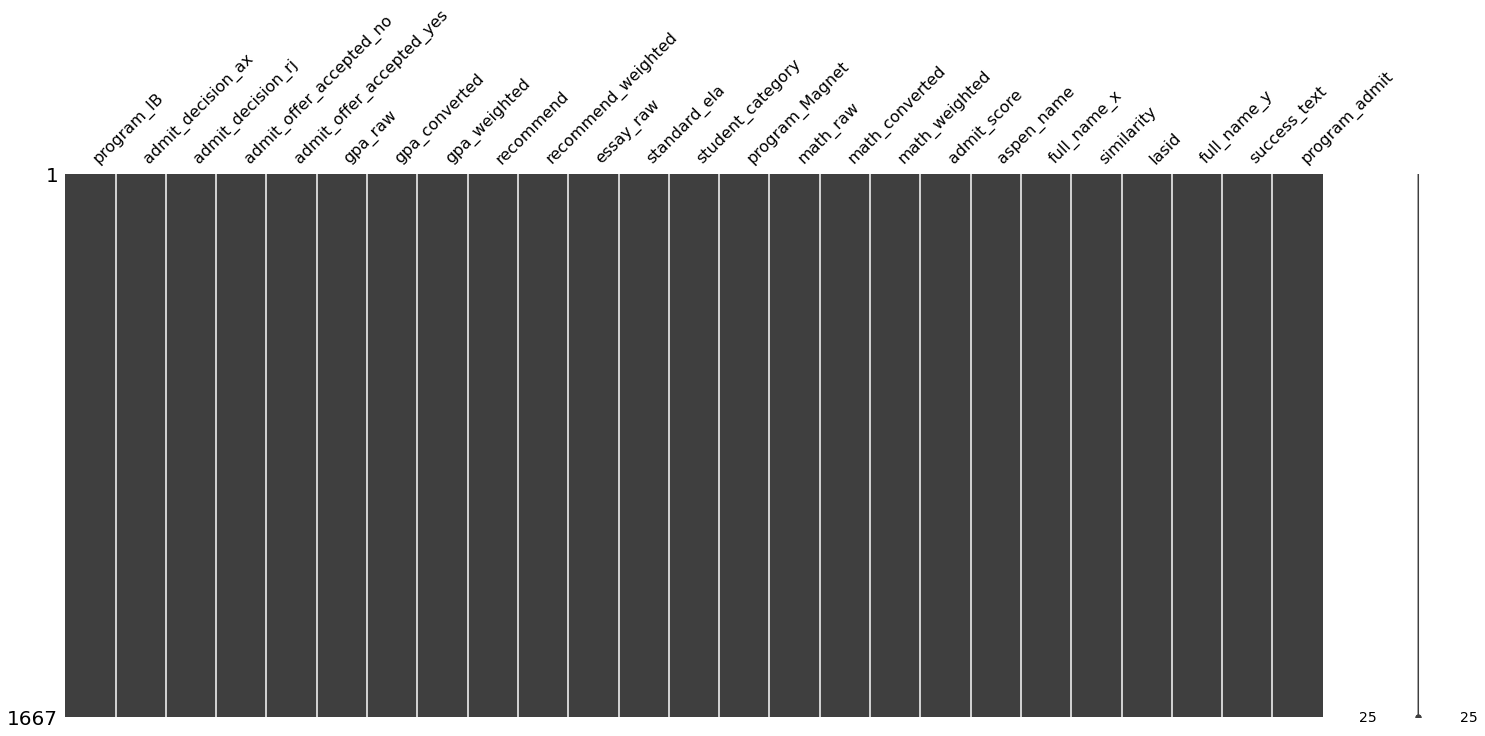

In [10]:
msno.matrix(magnet_df)

In [11]:
'''Retain relevant columns'''
drop_list = ['program_IB', 'admit_decision_ax', 'admit_decision_rj','admit_offer_accepted_no', 'admit_offer_accepted_yes',
             'gpa_converted', 'gpa_weighted',  'recommend_weighted', 'student_category', 'math_converted', 'math_weighted', 
             'program_admit', 'lasid', 'full_name_x', 'full_name_y', 'aspen_name', 'similarity', 'program_Magnet']

magnet_df.drop(drop_list, axis = 1, inplace=True)

<AxesSubplot:>

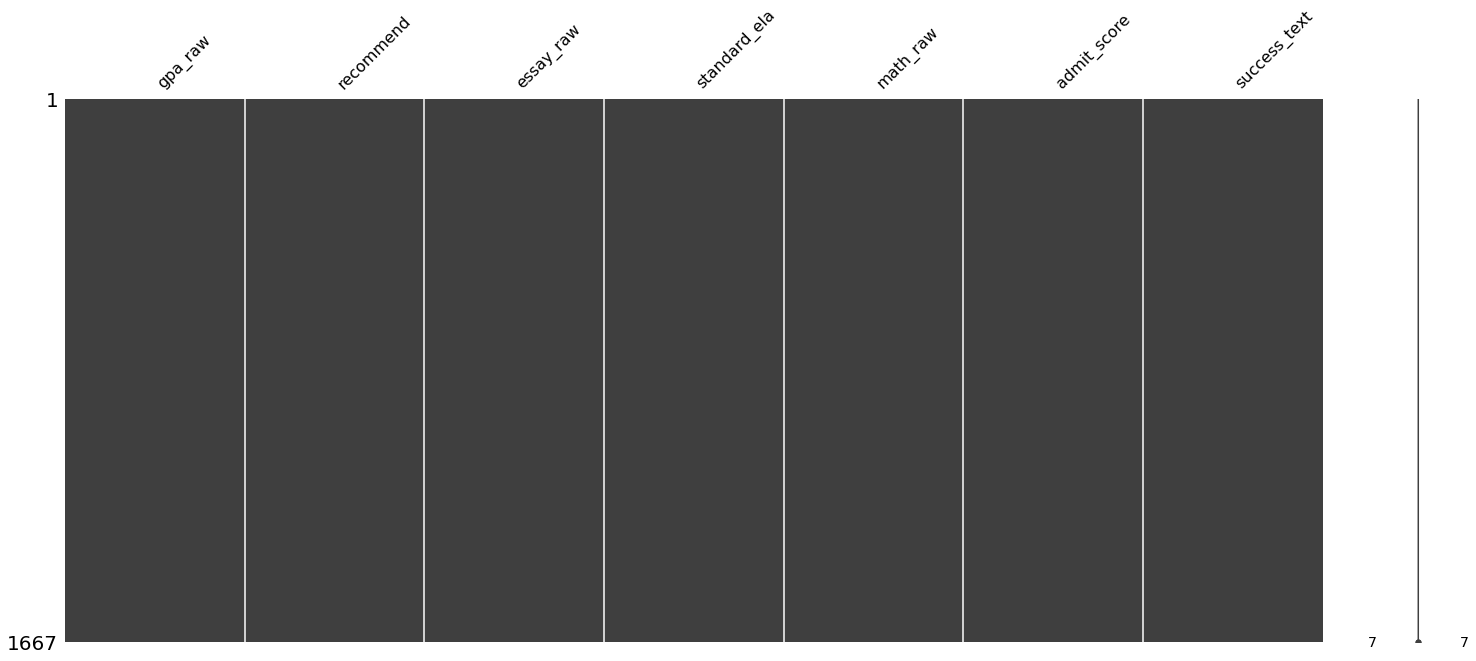

In [12]:
msno.matrix(magnet_df)

In [13]:
'''Function to retain relevant dataframe rows'''
def retain_relevent(df):
    df = df.loc[(df['success_text'] == 'Unsuccessful') | (df['success_text'] == 'Successful Completion')]
    return df

In [14]:
magnet_df = retain_relevent(magnet_df)
ib_df = retain_relevent(ib_df)
ib_df_interview = retain_relevent(ib_df_interview)

In [15]:
ib_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text
0,0.474797,0.512650,-0.974678,0.833438,0.432872,0.467957,Unsuccessful
1,-0.232809,0.233062,1.563612,1.123765,0.716924,0.420625,Unsuccessful
2,-1.148483,-1.048867,0.746869,1.123765,1.566712,-0.465263,Unsuccessful
3,-1.648680,-1.437284,-0.974678,-1.381791,-0.671867,-0.947218,Unsuccessful
4,0.960164,1.143712,0.746869,2.143121,0.183988,1.099779,Successful Completion
...,...,...,...,...,...,...,...
1706,-1.772463,-2.019796,-1.442595,-1.450911,-1.095893,-1.373821,Successful Completion
2198,-1.808207,-0.015230,-1.433599,-1.214344,-0.166043,-1.375297,Unsuccessful
2567,-0.791755,-2.107592,-1.727806,-0.482822,-1.063722,-1.508373,Unsuccessful
2611,0.122531,0.945201,-0.674247,-0.646860,0.298045,-0.865428,Unsuccessful


In [16]:
magnet_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text
46,1.883783,1.324729,0.771228,0.504843,1.973812,1.849077,Unsuccessful
47,0.602581,0.525293,-0.913868,0.504843,1.138698,0.498953,Unsuccessful
48,-1.000847,-1.267198,0.771228,0.087910,0.574230,-0.104172,Unsuccessful
50,-1.337670,-0.293408,0.771228,-1.242446,-0.167623,-0.536864,Unsuccessful
51,-0.051702,-1.613741,-0.002435,-0.523249,-0.250194,-0.483132,Unsuccessful
...,...,...,...,...,...,...,...
2624,1.240404,0.945201,0.008638,0.007978,0.936367,1.541632,Unsuccessful
2627,0.939156,0.671404,0.008638,0.007978,0.438191,1.504134,Unsuccessful
2630,0.987805,0.155159,0.008638,0.007978,0.494624,1.430180,Unsuccessful
2631,0.987805,0.045610,0.008638,0.007978,0.494624,1.411038,Unsuccessful


### IB Logistic Regression Analysis with interview

In [17]:
ib_df_interview['success_text'].value_counts()

Unsuccessful             127
Successful Completion     80
Name: success_text, dtype: Int64

In [18]:
'''Label encode success column'''
le = LabelEncoder()
ib_df_interview['success'] = le.fit_transform(ib_df_interview['success_text'])
le.classes_

array(['Successful Completion', 'Unsuccessful'], dtype=object)

In [19]:
'''Make 0=Unsuccessful and 1=Successful'''
ib_df_interview.loc[ib_df_interview['success'] == 1, 'success'] = 10
ib_df_interview.loc[ib_df_interview['success'] == 0, 'success'] = 1
ib_df_interview.loc[ib_df_interview['success'] == 10, 'success'] = 0

In [20]:
ib_df_interview

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,interview,admit_score,success_text,success
0,0.474797,0.512650,-0.974678,0.833438,0.432872,1.546686,0.467957,Unsuccessful,0
1,-0.232809,0.233062,1.563612,1.123765,0.716924,0.341053,0.420625,Unsuccessful,0
2,-1.148483,-1.048867,0.746869,1.123765,1.566712,0.860236,-0.465263,Unsuccessful,0
3,-1.648680,-1.437284,-0.974678,-1.381791,-0.671867,1.614642,-0.947218,Unsuccessful,0
4,0.960164,1.143712,0.746869,2.143121,0.183988,0.703276,1.099779,Successful Completion,1
...,...,...,...,...,...,...,...,...,...
608,-0.539175,0.175115,1.092849,-0.169893,-1.205922,0.270358,0.470091,Unsuccessful,0
609,1.761981,1.707002,-0.266515,0.440750,1.451299,-0.322705,1.150262,Unsuccessful,0
610,-0.188987,-0.322845,1.092849,0.338250,-0.791273,-0.171979,-0.066584,Unsuccessful,0
611,0.975024,1.142850,-0.635017,0.957534,0.763050,-0.487456,0.912417,Successful Completion,1


In [21]:
'''Since the target variable is imbalanced, we will utilize the SMOTE algorithm to balance the sample'''
X = ib_df_interview.drop(['success_text', 'success'], axis = 1)
y = ib_df_interview['success']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['success'])

'''Check the numbers in the oversampled data'''
print("Length of oversampled data is: ",len(os_data_X))
print("Number of successes in oversampled data:",len(os_data_y[os_data_y['success']==0]))
print("Number of non-successes in oversampled data:",len(os_data_y[os_data_y['success']==1]))
print("Proportion of success data in oversampled data is: ",len(os_data_y[os_data_y['success']==0])/len(os_data_X))
print("Proportion of non-success data in oversampled data is ",len(os_data_y[os_data_y['success']==1])/len(os_data_X))

Length of oversampled data is:  210
Number of successes in oversampled data: 105
Number of non-successes in oversampled data: 105
Proportion of success data in oversampled data is:  0.5
Proportion of non-success data in oversampled data is  0.5


In [22]:
'''Create logistic model with all predictive variables'''   
X = os_data_X
y = os_data_y

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.620299
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.105     
Dependent Variable: success          AIC:              274.5257  
Date:               2022-04-06 14:55 BIC:              297.9554  
No. Observations:   210              Log-Likelihood:   -130.26   
Df Model:           6                LL-Null:          -145.56   
Df Residuals:       203              LLR p-value:      3.0270e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
gpa_raw         0.3390    0.2377   1.4264  0.1538  -0.1268  0.8049
recommend       0.4833    0.2357   2.0501  0.0404   0.0213  0.

In [23]:
'''Utilize Recursive Feature Elmination to reduce variables'''
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
results = rfe.support_
print(results)

[False  True False  True False False  True]


In [24]:
'''Create new dataframe with dropped columns'''
columns_to_remove = X.columns.values[np.logical_not(results)]
columns_to_remove
X_drop = X.drop(columns=columns_to_remove)
X_drop

,recommend,standard_ela,admit_score
0,0.316861,-0.692659,-0.548968
1,-1.106338,0.338250,-0.196557
2,1.143712,2.143121,1.099779
3,-0.534821,-1.242446,0.400874
4,-0.971368,-0.730491,-0.001479
...,...,...,...
205,1.067328,0.932647,0.830314
206,1.035135,0.541571,0.808165
207,0.854922,-0.731742,0.577036
208,0.743161,0.538616,0.476521


In [25]:
'''Create logistic model with RFE narrowed variables'''   
X = X_drop
y = os_data_y

# building the model and fitting the data
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.632261
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.088     
Dependent Variable: success          AIC:              271.5497  
Date:               2022-04-06 14:55 BIC:              281.5910  
No. Observations:   210              Log-Likelihood:   -132.77   
Df Model:           2                LL-Null:          -145.56   
Df Residuals:       207              LLR p-value:      2.7995e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
recommend       0.6285    0.2184   2.8778  0.0040   0.2005  1.0566
standard_ela   -0.3312    0.1972  -1.6791  0.0931  -0.7177  0.

In [26]:
'''Split the data into training and testing sets in order to
create a confusion matrix.'''
X_train, X_test, y_train, y_test = train_test_split(X_drop, y.values.ravel(), test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
'''Run the test data through the algorithm into to assess the accuracy and 
reliability of its predictions'''
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [28]:
'''Create a confusion matrix in order to assess the model'''
cm_ib = confusion_matrix(y_test, y_pred)
print(cm_ib)

[[14  5]
 [10 13]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.72      0.57      0.63        23

    accuracy                           0.64        42
   macro avg       0.65      0.65      0.64        42
weighted avg       0.66      0.64      0.64        42



### IB Logistic Regression Analysis without interview

In [30]:
ib_df['success_text'].value_counts()

Unsuccessful             205
Successful Completion    121
Name: success_text, dtype: Int64

In [31]:
'''Label encode success column'''
le = LabelEncoder()
ib_df['success'] = le.fit_transform(ib_df['success_text'])
le.classes_

array(['Successful Completion', 'Unsuccessful'], dtype=object)

In [32]:
'''Make 0=Unsuccessful and 1=Successful'''
ib_df.loc[ib_df['success'] == 1, 'success'] = 10
ib_df.loc[ib_df['success'] == 0, 'success'] = 1
ib_df.loc[ib_df['success'] == 10, 'success'] = 0

In [33]:
ib_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text,success
0,0.474797,0.512650,-0.974678,0.833438,0.432872,0.467957,Unsuccessful,0
1,-0.232809,0.233062,1.563612,1.123765,0.716924,0.420625,Unsuccessful,0
2,-1.148483,-1.048867,0.746869,1.123765,1.566712,-0.465263,Unsuccessful,0
3,-1.648680,-1.437284,-0.974678,-1.381791,-0.671867,-0.947218,Unsuccessful,0
4,0.960164,1.143712,0.746869,2.143121,0.183988,1.099779,Successful Completion,1
...,...,...,...,...,...,...,...,...
1706,-1.772463,-2.019796,-1.442595,-1.450911,-1.095893,-1.373821,Successful Completion,1
2198,-1.808207,-0.015230,-1.433599,-1.214344,-0.166043,-1.375297,Unsuccessful,0
2567,-0.791755,-2.107592,-1.727806,-0.482822,-1.063722,-1.508373,Unsuccessful,0
2611,0.122531,0.945201,-0.674247,-0.646860,0.298045,-0.865428,Unsuccessful,0


In [34]:
'''Since the target variable is imbalanced, we will utilize the SMOTE algorithm to balance the sample'''
X = ib_df.drop(['success_text', 'success'], axis = 1)
y = ib_df['success']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['success'])

'''Check the numbers in the oversampled data'''
print("Length of oversampled data is: ",len(os_data_X))
print("Number of successes in oversampled data:",len(os_data_y[os_data_y['success']==0]))
print("Number of non-successes in oversampled data:",len(os_data_y[os_data_y['success']==1]))
print("Proportion of success data in oversampled data is: ",len(os_data_y[os_data_y['success']==0])/len(os_data_X))
print("Proportion of non-success data in oversampled data is ",len(os_data_y[os_data_y['success']==1])/len(os_data_X))

Length of oversampled data is:  330
Number of successes in oversampled data: 165
Number of non-successes in oversampled data: 165
Proportion of success data in oversampled data is:  0.5
Proportion of non-success data in oversampled data is  0.5


In [35]:
'''Create logistic model with all predictive variables'''   
X = os_data_X
y = os_data_y

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.637758
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.080     
Dependent Variable: success          AIC:              432.9203  
Date:               2022-04-06 14:55 BIC:              455.7148  
No. Observations:   330              Log-Likelihood:   -210.46   
Df Model:           5                LL-Null:          -228.74   
Df Residuals:       324              LLR p-value:      7.3482e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gpa_raw       -0.0439    0.1737  -0.2527  0.8005  -0.3844   0.2966
recommend      0.2443    0.1785   1.3687  0.1711  -0.1055   0.

In [36]:
'''Utilize Recursive Feature Elmination to reduce variables'''
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
results = rfe.support_
print(results)

[False False  True  True False  True]


In [37]:
'''Create new dataframe with dropped columns'''
columns_to_remove = X.columns.values[np.logical_not(results)]
columns_to_remove
X_drop = X.drop(columns=columns_to_remove)
X_drop

,essay_raw,standard_ela,admit_score
0,1.563612,1.123765,0.420625
1,0.494381,-0.049751,0.672800
2,0.746869,-0.392179,-0.169969
3,-0.752165,-1.309821,-0.563814
4,-0.765013,0.218462,0.171145
...,...,...,...
325,-1.061856,-1.845926,-0.585102
326,0.354229,1.303972,1.236267
327,0.750440,-0.532955,0.594972
328,-0.328810,-0.670394,-0.634424


In [38]:
'''Create logistic model with RFE narrowed variables'''   
X = X_drop
y = os_data_y

# building the model and fitting the data
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.652941
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: success          AIC:              436.9411  
Date:               2022-04-06 14:55 BIC:              448.3384  
No. Observations:   330              Log-Likelihood:   -215.47   
Df Model:           2                LL-Null:          -228.74   
Df Residuals:       327              LLR p-value:      1.7289e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
essay_raw     -0.3881    0.1357  -2.8604  0.0042  -0.6541  -0.1222
standard_ela  -0.3589    0.1601  -2.2416  0.0250  -0.6727  -0.

In [39]:
'''Split the data into training and testing sets in order to
create a confusion matrix.'''
X_train, X_test, y_train, y_test = train_test_split(X_drop, y.values.ravel(), test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [40]:
'''Run the test data through the algorithm into to assess the accuracy and 
reliability of its predictions'''
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [41]:
'''Create a confusion matrix in order to assess the model'''
cm_ib = confusion_matrix(y_test, y_pred)
print(cm_ib)

[[19 17]
 [ 6 24]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.53      0.62        36
           1       0.59      0.80      0.68        30

    accuracy                           0.65        66
   macro avg       0.67      0.66      0.65        66
weighted avg       0.68      0.65      0.65        66



### Magnet Logistic Regression Analysis

In [43]:
magnet_df['success_text'].value_counts()

Unsuccessful             185
Successful Completion    158
Name: success_text, dtype: Int64

In [44]:
'''Label encode success column'''
le = LabelEncoder()
magnet_df['success'] = le.fit_transform(magnet_df['success_text'])
le.classes_

array(['Successful Completion', 'Unsuccessful'], dtype=object)

In [45]:
'''Make 0=Unsuccessful and 1=Successful'''
magnet_df.loc[magnet_df['success'] == 1, 'success'] = 10
magnet_df.loc[magnet_df['success'] == 0, 'success'] = 1
magnet_df.loc[magnet_df['success'] == 10, 'success'] = 0

In [46]:
magnet_df

,gpa_raw,recommend,essay_raw,standard_ela,math_raw,admit_score,success_text,success
46,1.883783,1.324729,0.771228,0.504843,1.973812,1.849077,Unsuccessful,0
47,0.602581,0.525293,-0.913868,0.504843,1.138698,0.498953,Unsuccessful,0
48,-1.000847,-1.267198,0.771228,0.087910,0.574230,-0.104172,Unsuccessful,0
50,-1.337670,-0.293408,0.771228,-1.242446,-0.167623,-0.536864,Unsuccessful,0
51,-0.051702,-1.613741,-0.002435,-0.523249,-0.250194,-0.483132,Unsuccessful,0
...,...,...,...,...,...,...,...,...
2624,1.240404,0.945201,0.008638,0.007978,0.936367,1.541632,Unsuccessful,0
2627,0.939156,0.671404,0.008638,0.007978,0.438191,1.504134,Unsuccessful,0
2630,0.987805,0.155159,0.008638,0.007978,0.494624,1.430180,Unsuccessful,0
2631,0.987805,0.045610,0.008638,0.007978,0.494624,1.411038,Unsuccessful,0


In [47]:
'''Create logistic model with all predictive variables'''   
X = magnet_df.drop(['success_text', 'success'], axis = 1)
y = magnet_df['success']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.674997
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.022   
Dependent Variable: success          AIC:              475.0479
Date:               2022-04-06 14:57 BIC:              498.0743
No. Observations:   343              Log-Likelihood:   -231.52 
Df Model:           5                LL-Null:          -236.69 
Df Residuals:       337              LLR p-value:      0.066571
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
gpa_raw          0.4514   0.1787  2.5255 0.0116  0.1011  0.8016
recommend       -0.2466   0.1489 -1.6565 0.0976 -0.5384  0.0452
essay_raw       -0.0071   0

In [48]:
'''Utilize Recursive Feature Elmination to reduce variables'''
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
results = rfe.support_
print(results)

[ True False False False  True  True]


In [49]:
'''Create new dataframe with dropped columns'''
columns_to_remove = X.columns.values[np.logical_not(results)]
columns_to_remove
X_drop = X.drop(columns=columns_to_remove)
X_drop

,gpa_raw,math_raw,admit_score
46,1.883783,1.973812,1.849077
47,0.602581,1.138698,0.498953
48,-1.000847,0.574230,-0.104172
50,-1.337670,-0.167623,-0.536864
51,-0.051702,-0.250194,-0.483132
...,...,...,...
2624,1.240404,0.936367,1.541632
2627,0.939156,0.438191,1.504134
2630,0.987805,0.494624,1.430180
2631,0.987805,0.494624,1.411038


In [50]:
'''Create logistic model with RFE narrowed variables'''   
X = X_drop
y = magnet_df['success']

# building the model and fitting the data
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.681961
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.012   
Dependent Variable: success          AIC:              473.8250
Date:               2022-04-06 14:57 BIC:              485.3382
No. Observations:   343              Log-Likelihood:   -233.91 
Df Model:           2                LL-Null:          -236.69 
Df Residuals:       340              LLR p-value:      0.062461
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
gpa_raw          0.3740   0.1525  2.4528 0.0142  0.0752  0.6729
math_raw         0.2591   0.1955  1.3256 0.1850 -0.1240  0.6423
admit_score     -0.5955   0

In [51]:
'''Split the data into training and testing sets in order to
create a confusion matrix.'''
X_train, X_test, y_train, y_test = train_test_split(X_drop, y.values.ravel(), test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
'''Run the test data through the algorithm into to assess the accuracy and 
reliability of its predictions'''
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [53]:
'''Create a confusion matrix in order to assess the model'''
cm_magnet = confusion_matrix(y_test, y_pred)
print(cm_magnet)

[[33  3]
 [26  7]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.92      0.69        36
           1       0.70      0.21      0.33        33

    accuracy                           0.58        69
   macro avg       0.63      0.56      0.51        69
weighted avg       0.63      0.58      0.52        69

